In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.colors as col
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator, LogLocator
import scipy.stats
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm, LinearSegmentedColormap
import matplotlib.lines as mlines
from plotpack import *
%matplotlib inline

# font size and style
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 45}
legsize = 25
axsize  = 22
marksize   = 13
majticklen = 20
minticklen = 10
tickwidth  = 5
matplotlib.rc('font', **font)

vtcol = ['black', 'tab:blue', 'skyblue','dimgray', 'darkgray', 'magenta']
labels = ['20', '50', '100', '200', '500']
ls    = ['solid', 'dashed', 'dotted', 'dashdot']

/tmp/ipykernel_26847/2011637034.py:11: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [2]:
directory = './experiments/h_depend/'
oform     = '.dat'
var       = ['i', 'z', 'D', 'mtot', 'phi', 'vt', 'Re', 'T', 'p']

files    = ['boehm_height_dep_drop', 'boehm_height_dep_obla', 'boehm_height_dep_prol','boehm_height_dep_grau' ]

drops    = pd.read_csv(directory+files[0]+oform, delimiter = " ", names=var)
obla     = pd.read_csv(directory+files[1]+oform, delimiter = " ", names=var)
prol     = pd.read_csv(directory+files[2]+oform, delimiter = " ", names=var)
grau     = pd.read_csv(directory+files[3]+oform, delimiter = " ", names=var)
drops.reset_index(drop = True, inplace = True)
obla.reset_index(drop = True, inplace = True)
prol.reset_index(drop = True, inplace = True)
grau.reset_index(drop = True, inplace = True)

intervall = drops["i"] == 1.0
z_co = drops["z"][intervall]
#print(drops["p"][0:10])

In [3]:
directory = './experiments/h_depend/'
oform     = '.dat'
var       = ['i', 'z', 'D1', 'D2', 'mtot', 'phi1', 'phi2', 'dv', 'Re', 'T', 'p', 'Ec', 'K']
labels2 = ['(0)', '(1)', '(2)', '(3)', '(4)', '(5)']

files    = ['boehm_Ec_height_dep_d-d', 'boehm_Ec_height_dep_d-g', 'boehm_Ec_height_dep_o-o', 'boehm_Ec_height_dep_p-p' ]

dd    = pd.read_csv(directory+files[0]+oform, delimiter = " ", names=var)
di    = pd.read_csv(directory+files[1]+oform, delimiter = " ", names=var)
ii    = pd.read_csv(directory+files[2]+oform, delimiter = " ", names=var)
pl    = pd.read_csv(directory+files[3]+oform, delimiter = " ", names=var)
dd.reset_index(drop = True, inplace = True)
di.reset_index(drop = True, inplace = True)
ii.reset_index(drop = True, inplace = True)
pl.reset_index(drop = True, inplace = True)

intervall = dd["i"] == 2.0
z_co = dd["z"][intervall]

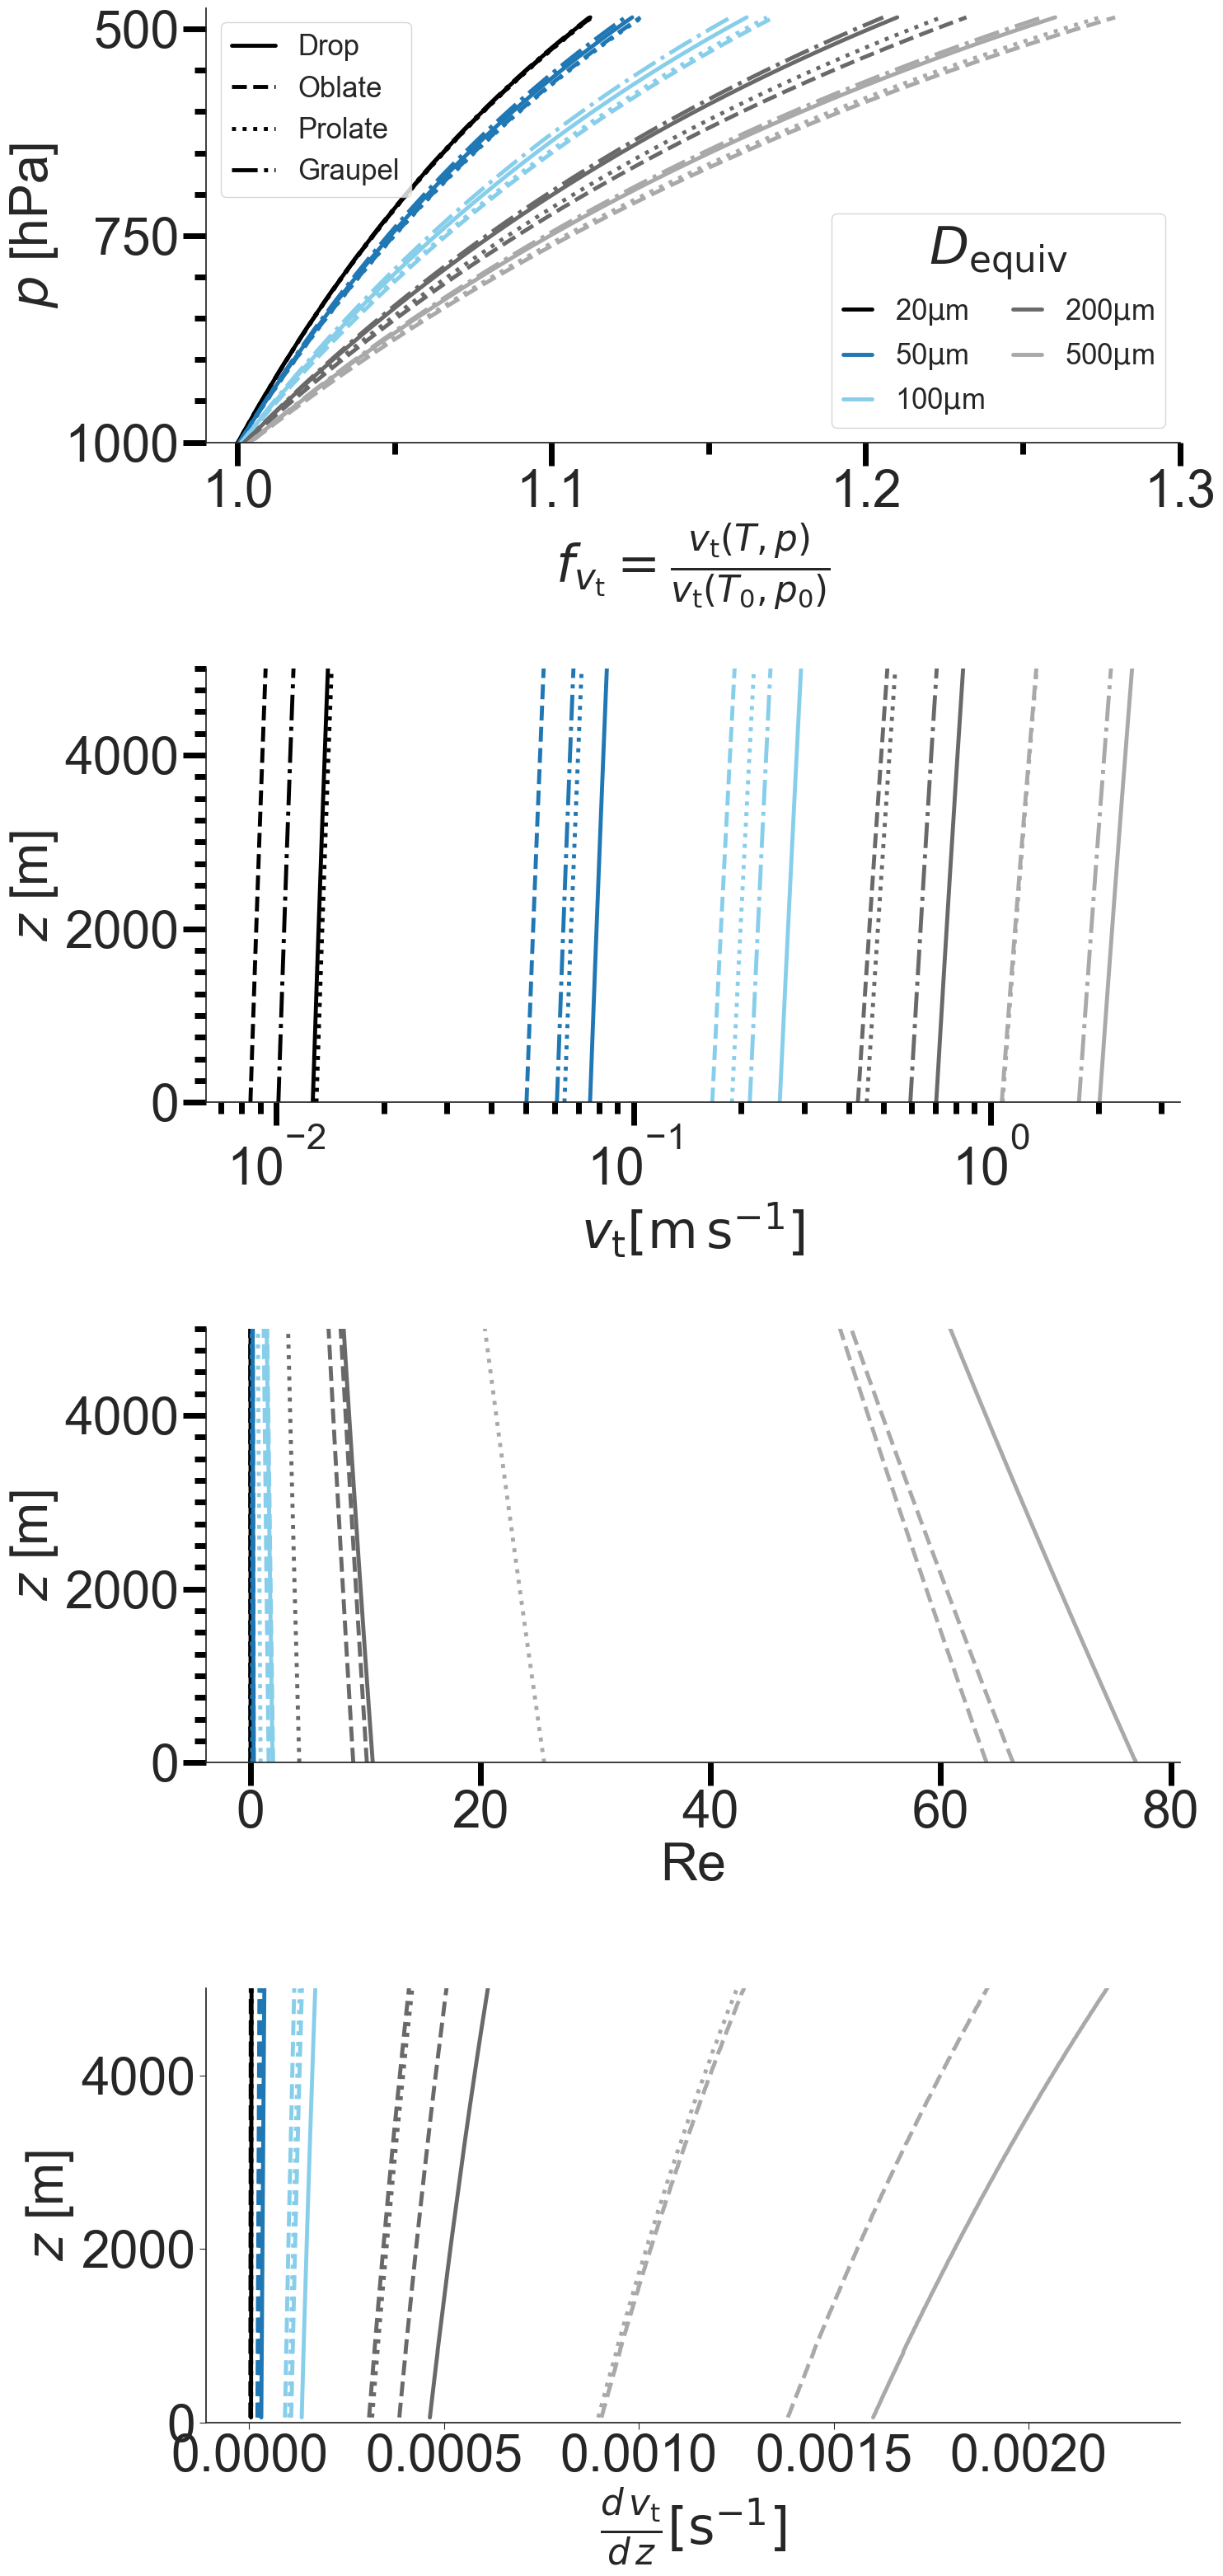

In [4]:
pp   = PdfPages('./PDFs/boehm_h_dependency.pdf')
row, col = [4,1]
fig = plt.figure(figsize=(16*col,9*row))

ax4 = plt.subplot(row, col, 1)
ax4.set_xlabel('$f_{v_\mathrm{t}} = \\frac{v_\mathrm{t}(T,p)}{v_\mathrm{t}(T_0,p_0)} $')
ax4.set_ylabel('$p$ [hPa]')
#ax4.set_xscale('log')
ax4.set_ylim(4.75e2, 1e3)
ax4.set_xlim(0.99, 1.3)
ax4.invert_yaxis()

for ni in range(5):
    intervall = drops["i"] == float(ni+1)
    dro, = ax4.plot(drops['vt'][intervall] / drops['vt'][ni * 275 + 5], drops['p'][intervall]/100, c=vtcol[ni], linestyle=ls[0],label=labels[ni]+'$\mathrm{\mu}$m' )
    obl, = ax4.plot(obla['vt'][intervall]  / obla['vt'][ni * 275 + 5],  obla['p'][intervall]/100,  c=vtcol[ni], linestyle=ls[1] )
    pro, = ax4.plot(prol['vt'][intervall]  / prol['vt'][ni * 275 + 5],  prol['p'][intervall]/100,  c=vtcol[ni], linestyle=ls[2] )
    gra, = ax4.plot(grau['vt'][intervall]  / grau['vt'][ni * 275 + 5],  prol['p'][intervall]/100,  c=vtcol[ni], linestyle=ls[3] )

ax4.tick_params(axis='both', which='major', length=majticklen, width=tickwidth, color='black')
ax4.tick_params(axis='both', which='minor', length=minticklen, width=tickwidth, color='black')
ax4.yaxis.set_minor_locator(MultipleLocator(base = 50))
ax4.yaxis.set_major_locator(MultipleLocator(base = 250))
ax4.xaxis.set_minor_locator(MultipleLocator(base = .05))

leg = ax4.legend(fontsize = legsize,title="$D_\mathrm{equiv}$",loc='lower right', ncol=2, columnspacing = 1, handlelength=1., frameon=True)
legend2 = ax4.legend([dro, obl, pro, gra], ["Drop", "Oblate","Prolate", "Graupel"], loc="upper left", ncol=1, fontsize = legsize, columnspacing = 1, handlelength=1.5, frameon=True)
for lh in legend2.legendHandles: 
    lh.set_color('black')
ax4.add_artist(leg)
#ax4.hlines(y=[750,500], xmin=0, xmax=2., color='grey', alpha=0.2, linestyle='--')

pp.savefig(bbox_inches = 'tight', pad_inches = 0.5)


ax1 = plt.subplot(row, col, 2)
ax1.set_xlabel('$v_\mathrm{t} \mathrm{[m\,s}^{-1}]$')
ax1.set_ylabel('$z$ [m]')
ax1.set_xscale('log')
ax1.set_ylim(0,5e3)
    
ax1.tick_params(axis='both', which='major', length=majticklen, width=tickwidth, color='black')
ax1.tick_params(axis='both', which='minor', length=minticklen, width=tickwidth, color='black')
ax1.yaxis.set_minor_locator(MultipleLocator(base = 250))

ax2 = plt.subplot(row, col, 3)
ax2.set_xlabel('Re')
ax2.set_ylabel('$z$ [m]')
ax2.set_ylim(0,5e3)

ax2.tick_params(axis='both', which='major', length=majticklen, width=tickwidth, color='black')
ax2.tick_params(axis='both', which='minor', length=minticklen, width=tickwidth, color='black')
ax2.yaxis.set_minor_locator(MultipleLocator(base = 250))

ax3 = plt.subplot(row, col, 4)
ax3.set_xlabel('$\\frac{d\,v_\mathrm{t}}{d\,z} \mathrm{[s}^{-1}]$')
ax3.set_ylabel('$z$ [m]')
#ax3.set_xscale('log')
ax3.set_ylim(0,5e3)


for ni in range(5):
    intervall = drops["i"] == float(ni+1)
    dro,  = ax1.plot(drops['vt'][intervall], z_co, c=vtcol[ni],linestyle=ls[0], label=labels[ni]+'$\mathrm{\mu}$m' )
    obl,  = ax1.plot(obla['vt'][intervall], z_co, c=vtcol[ni], linestyle=ls[1] )
    pro,  = ax1.plot(prol['vt'][intervall], z_co, c=vtcol[ni], linestyle=ls[2] )
    gra,  = ax1.plot(grau['vt'][intervall], z_co, c=vtcol[ni], linestyle=ls[3] )
    ax2.plot(drops['Re'][intervall], z_co, c=vtcol[ni],linestyle=ls[0], label=labels[ni]+'$\mathrm{\mu}$m' )
    ax2.plot(obla['Re'][intervall], z_co, c=vtcol[ni], linestyle=ls[1] )
    ax2.plot(prol['Re'][intervall], z_co, c=vtcol[ni], linestyle=ls[2] )
    ax2.plot(grau['Re'][intervall], z_co, c=vtcol[ni], linestyle='--' )
    ax3.plot(np.gradient(drops['vt'][intervall])[3:], z_co[3:], c=vtcol[ni],linestyle=ls[0], label=labels[ni]+'$\mathrm{\mu}$m' )
    ax3.plot(np.gradient(obla['vt'][intervall])[3:], z_co[3:], c=vtcol[ni], linestyle=ls[1] )
    ax3.plot(np.gradient(prol['vt'][intervall])[3:], z_co[3:], c=vtcol[ni], linestyle=ls[2] )
    ax3.plot(np.gradient(grau['vt'][intervall])[3:], z_co[3:], c=vtcol[ni], linestyle='--' )
    

plt.tight_layout(rect=[0, 0.0, 1, 0.9])

pp.savefig(bbox_inches = 'tight', pad_inches = 0.5)
#fig.savefig('./PDFs/m2d_plots_IGF'+str(IGFt)+'_novent.png')


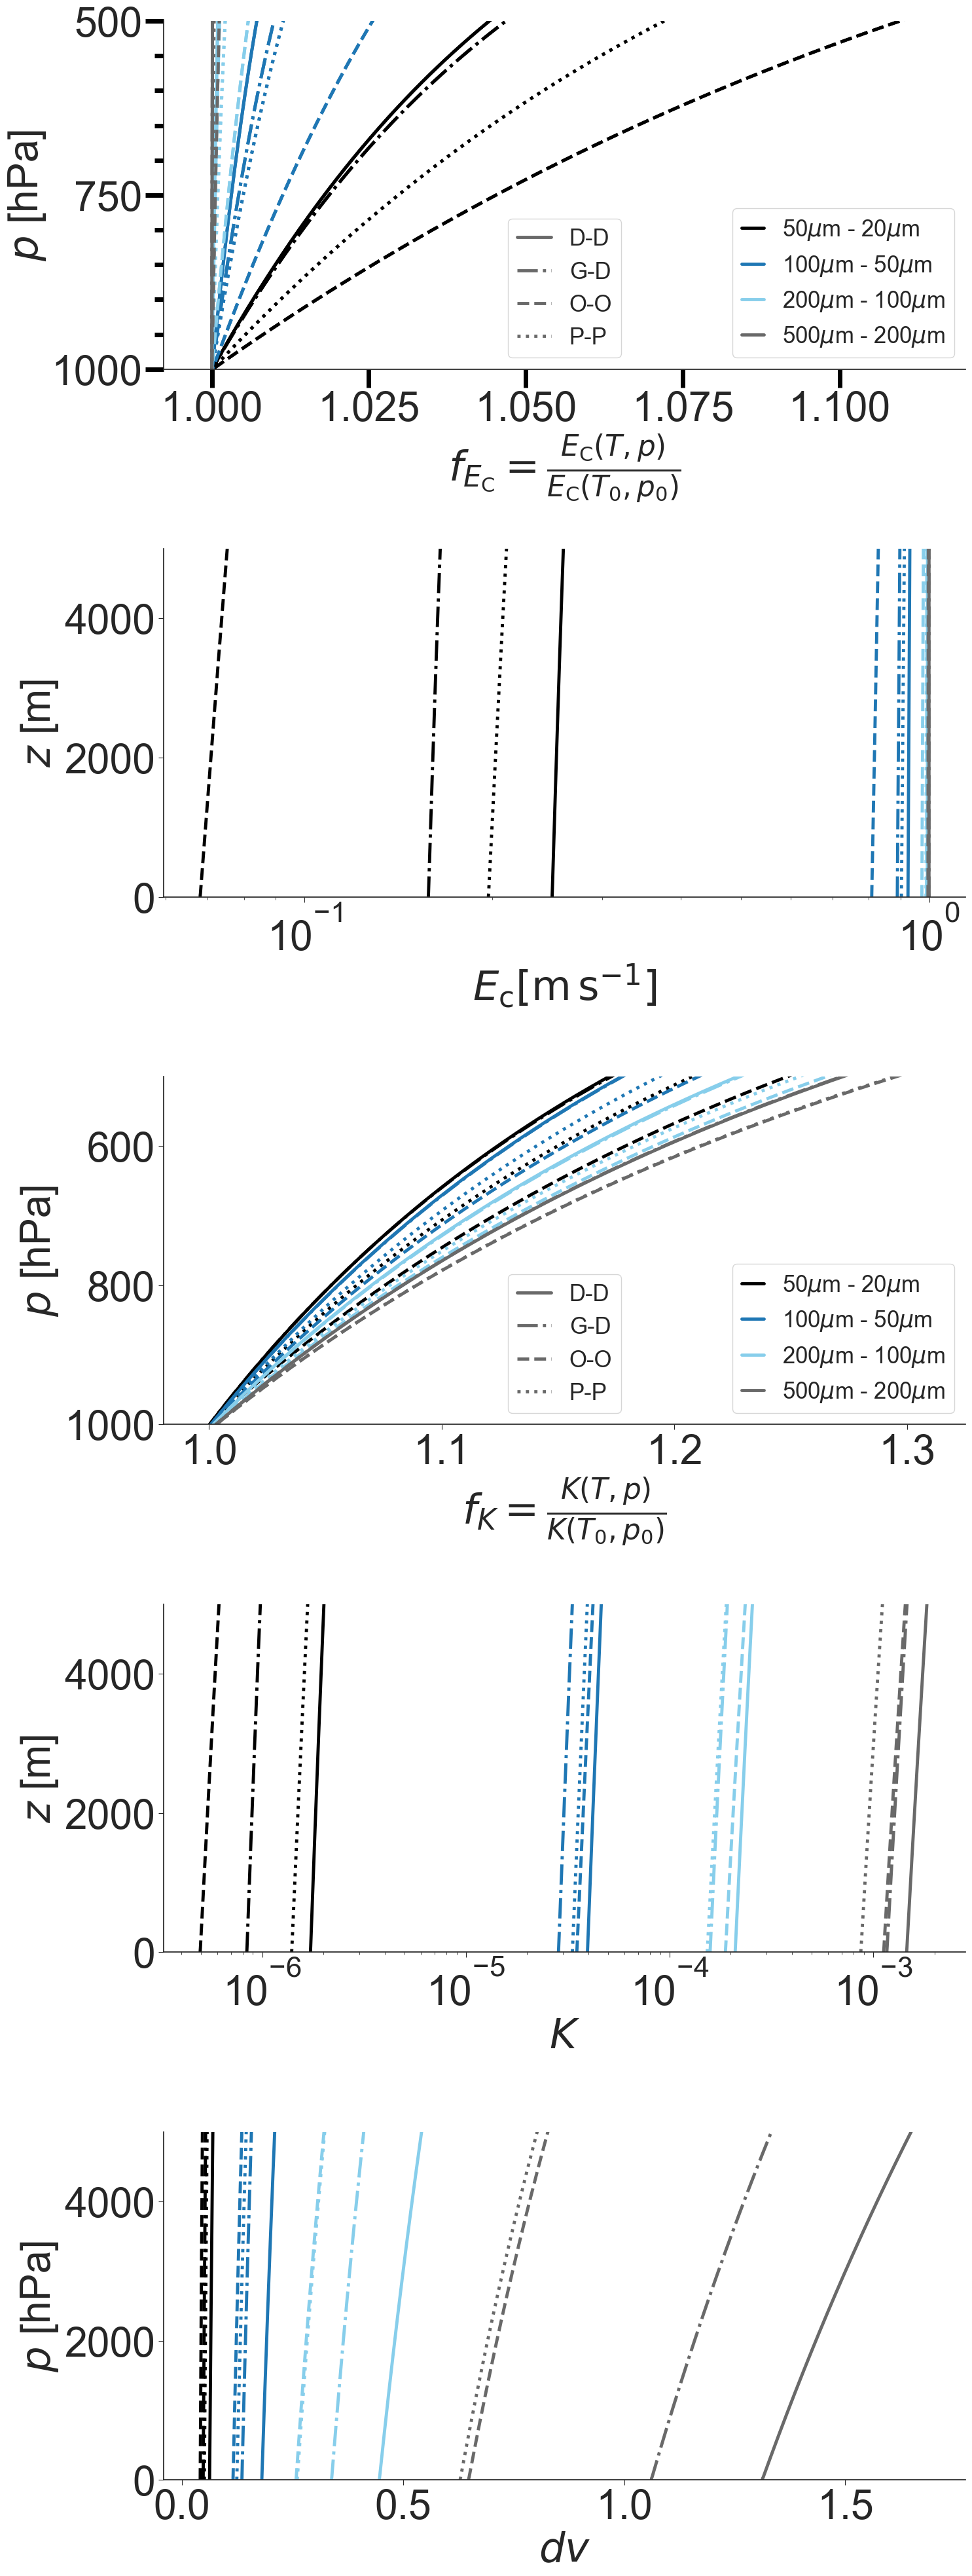

In [5]:
#pp   = PdfPages('./PDFs/boehm_Ec_h_dependency.pdf')
row, col = [5,1]
fig = plt.figure(figsize=(16*col,9*row))



ax4 = plt.subplot(row, col, 1)
ax4.set_xlabel('$f_{E_\mathrm{C}} = \\frac{E_\mathrm{C}(T,p)}{E_\mathrm{C}(T_0,p_0)} $')
ax4.set_ylabel('$p$ [hPa]')
#ax4.set_xscale('log')
ax4.set_ylim(5e2, 1e3)
ax4.invert_yaxis()

low, up = [1,5]
for ni in range(low,up):
    intervall = dd["i"] == float(ni+1)
    dede, = ax4.plot(dd['Ec'][intervall] / dd['Ec'][(ni-1) * 275 + 5],  dd['p'][intervall]/100, c=vtcol[ni-1] , label=labels[ni]+"$\mu$m - "+labels[ni-1]+'$\mu$m' )
    didi, = ax4.plot(di['Ec'][intervall] / di['Ec'][(ni-1) * 275 + 5],  di['p'][intervall]/100, c=vtcol[ni-1], linestyle='dashdot' )
    eiei, = ax4.plot(ii['Ec'][intervall] / ii['Ec'][(ni-1) * 275 + 5],  ii['p'][intervall]/100, c=vtcol[ni-1], linestyle='--' )
    plpl, = ax4.plot(pl['Ec'][intervall] / pl['Ec'][(ni-1) * 275 + 5],  pl['p'][intervall]/100, c=vtcol[ni-1], linestyle='dotted' )
    
leg = ax4.legend(fontsize = legsize,loc='lower right', ncol=1,columnspacing = 1, handlelength=1., frameon=True)
legend2 = ax4.legend([dede, didi, eiei, plpl], ["D-D","G-D", "O-O", "P-P"], loc="lower center", ncol=1, fontsize = legsize, columnspacing = 1, handlelength=1.5, frameon=True)
ax4.add_artist(leg)

ax4.tick_params(axis='both', which='major', length=majticklen, width=tickwidth, color='black')
ax4.tick_params(axis='both', which='minor', length=minticklen, width=tickwidth, color='black')
ax4.yaxis.set_minor_locator(MultipleLocator(base = 50))
ax4.yaxis.set_major_locator(MultipleLocator(base = 250))
ax4.xaxis.set_minor_locator(MultipleLocator(base = .05))

pp.savefig(bbox_inches = 'tight', pad_inches = 0.5)

ax1 = plt.subplot(row, col, 2)
ax1.set_xlabel('$E_\mathrm{c} \mathrm{[m\,s}^{-1}]$')
ax1.set_ylabel('$z$ [m]')
ax1.set_xscale('log')
ax1.set_ylim(0,5e3)

ax2 = plt.subplot(row, col, 4)
ax2.set_xlabel('$K} \mathrm{[m\,s}^{-1}]$')
ax2.set_ylabel('$z$ [m]')
ax2.set_xscale('log')
ax2.set_ylim(0,5e3)

ax3 = plt.subplot(row, col, 3)
ax3.set_xlabel('$f_K = \\frac{K(T,p)}{K(T_0,p_0)} $')
ax3.set_ylabel('$p$ [hPa]')
#ax4.set_xscale('log')
ax3.set_ylim(5e2, 1e3)
ax3.invert_yaxis()

ax5 = plt.subplot(row, col, 5)
ax5.set_xlabel('$dv $')
ax5.set_ylabel('$p$ [hPa]')
#ax4.set_xscale('log')
ax5.set_ylim(0,5e3)


low, up = [1,5]
for ni in range(low,up):
    intervall = dd["i"] == float(ni+1)
    #print(dd['Ec'][intervall])
    dede,  = ax1.plot(dd['Ec'][intervall], z_co, c=vtcol[ni-1], label=labels[ni]+" - "+labels[ni-1] )
    didi,  = ax1.plot(di['Ec'][intervall], z_co, c=vtcol[ni-1], linestyle='dashdot' )
    eiei,  = ax1.plot(ii['Ec'][intervall], z_co, c=vtcol[ni-1], linestyle='--' )
    plpl,  = ax1.plot(pl['Ec'][intervall], z_co, c=vtcol[ni-1], linestyle='dotted' )
    ax4.plot(dd['Ec'][intervall] / dd['Ec'][(ni-1) * 275 + 5],  dd['p'][intervall]/100, c=vtcol[ni-1] , label=labels[ni]+"$\mu$m - "+labels[ni-1]+'$\mu$m' )
    ax4.plot(di['Ec'][intervall] / di['Ec'][(ni-1) * 275 + 5],  di['p'][intervall]/100, c=vtcol[ni-1], linestyle='dashdot' )
    ax4.plot(ii['Ec'][intervall] / ii['Ec'][(ni-1) * 275 + 5],  ii['p'][intervall]/100, c=vtcol[ni-1], linestyle='--' )
    ax4.plot(pl['Ec'][intervall] / pl['Ec'][(ni-1) * 275 + 5],  pl['p'][intervall]/100, c=vtcol[ni-1], linestyle='dotted' )
    ax2.plot(dd['K'][intervall], z_co, c=vtcol[ni-1], label=labels[ni]+" - "+labels[ni-1] )
    ax2.plot(di['K'][intervall], z_co, c=vtcol[ni-1], linestyle='dashdot' )
    ax2.plot(ii['K'][intervall], z_co, c=vtcol[ni-1], linestyle='--' )
    ax2.plot(pl['K'][intervall], z_co, c=vtcol[ni-1], linestyle='dotted' )
    ax3.plot(dd['K'][intervall] / dd['K'][(ni-1) * 275 + 5],  dd['p'][intervall]/100, c=vtcol[ni-1] , label=labels[ni]+"$\mu$m - "+labels[ni-1]+'$\mu$m' )
    ax3.plot(di['K'][intervall] / di['K'][(ni-1) * 275 + 5],  di['p'][intervall]/100, c=vtcol[ni-1], linestyle='dashdot' )
    ax3.plot(ii['K'][intervall] / ii['K'][(ni-1) * 275 + 5],  ii['p'][intervall]/100, c=vtcol[ni-1], linestyle='--' )
    ax3.plot(pl['K'][intervall] / pl['K'][(ni-1) * 275 + 5],  pl['p'][intervall]/100, c=vtcol[ni-1], linestyle='dotted' )
    ax5.plot(dd['dv'][intervall], z_co, c=vtcol[ni-1], label=labels[ni]+" - "+labels[ni-1] )
    ax5.plot(di['dv'][intervall], z_co, c=vtcol[ni-1], linestyle='dashdot' )
    ax5.plot(ii['dv'][intervall], z_co, c=vtcol[ni-1], linestyle='--' )
    ax5.plot(pl['dv'][intervall], z_co, c=vtcol[ni-1], linestyle='dotted' ) 
    

leg = ax3.legend(fontsize = legsize,loc='lower right', ncol=1,columnspacing = 1, handlelength=1., frameon=True)
legend2 = ax3.legend([dede, didi, eiei, plpl], ["D-D","G-D", "O-O", "P-P"], loc="lower center", ncol=1, fontsize = legsize, columnspacing = 1, handlelength=1.5, frameon=True)
ax3.add_artist(leg)

plt.tight_layout(rect=[0, 0.0, 1, 0.9])

pp.savefig(bbox_inches = 'tight', pad_inches = 0.5)
#fig.savefig('./PDFs/m2d_plots_IGF'+str(IGFt)+'_novent.png')


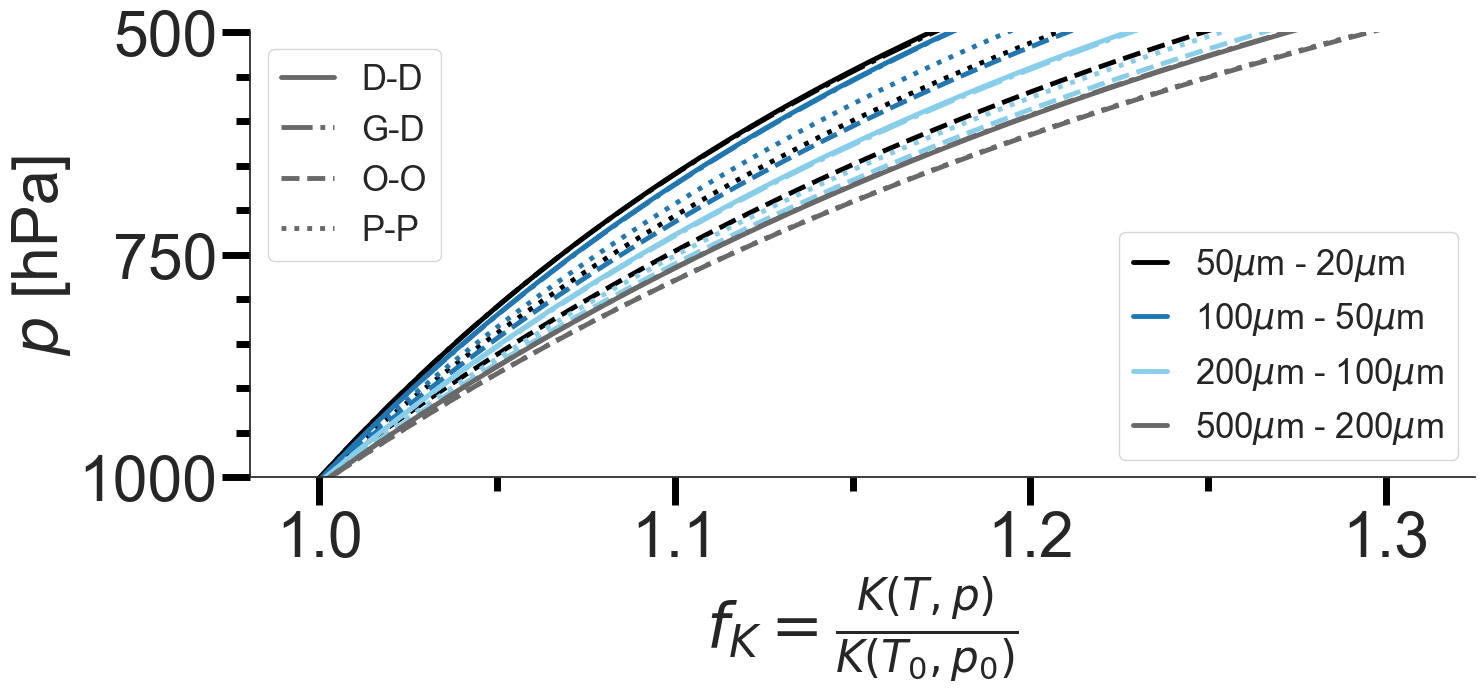

In [6]:
row, col = [1,1]
fig = plt.figure(figsize=(16*col,9*row))

ax3 = plt.subplot(row, col, 1)
ax3.set_xlabel('$f_K = \\frac{K(T,p)}{K(T_0,p_0)} $')
ax3.set_ylabel('$p$ [hPa]')
#ax4.set_xscale('log')
ax3.set_ylim(5e2, 1e3)
ax3.invert_yaxis()
for ni in range(low,up):
    intervall = dd["i"] == float(ni+1)
    dede, = ax3.plot(dd['K'][intervall] / dd['K'][(ni-1) * 275 + 5],  dd['p'][intervall]/100, c=vtcol[ni-1] , label=labels[ni]+"$\mu$m - "+labels[ni-1]+'$\mu$m' )
    didi, = ax3.plot(di['K'][intervall] / di['K'][(ni-1) * 275 + 5],  di['p'][intervall]/100, c=vtcol[ni-1], linestyle='dashdot' )
    eiei, = ax3.plot(ii['K'][intervall] / ii['K'][(ni-1) * 275 + 5],  ii['p'][intervall]/100, c=vtcol[ni-1], linestyle='--' )
    plpl, = ax3.plot(pl['K'][intervall] / pl['K'][(ni-1) * 275 + 5],  pl['p'][intervall]/100, c=vtcol[ni-1], linestyle='dotted' )

leg = ax3.legend(fontsize = legsize,loc='lower right', ncol=1,columnspacing = 1, handlelength=1., frameon=True)
legend2 = ax3.legend([dede, didi, eiei, plpl], ["D-D","G-D", "O-O", "P-P"], loc="upper left", ncol=1, fontsize = legsize, columnspacing = 1, handlelength=1.5, frameon=True)
ax3.add_artist(leg)

ax3.tick_params(axis='both', which='major', length=majticklen, width=tickwidth, color='black')
ax3.tick_params(axis='both', which='minor', length=minticklen, width=tickwidth, color='black')
ax3.yaxis.set_minor_locator(MultipleLocator(base = 50))
ax3.yaxis.set_major_locator(MultipleLocator(base = 250))
ax3.xaxis.set_minor_locator(MultipleLocator(base = .05))
    
plt.tight_layout(rect=[0, 0.0, 1, 0.9])

pp.savefig(bbox_inches = 'tight', pad_inches = 0.5)
pp.close()